So let's write a series of functions that import the raw data and spits out a csv of the series data.

This has been split off as a separate Data Parser notebook

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
filenames=np.concatenate((["./Digital-files-raw-from-NSSDCA/5289 (VL-1)/DR005289_F0000"+str(i)+".PHYS" for i in range(1,7)],["./Digital-files-raw-from-NSSDCA/5967 (VL-2)/DR005967_F0000"+str(i)+".PHYS" for i in range(1,10)],["./Digital-files-raw-from-NSSDCA/5967 (VL-2)/DR005967_F00010.PHYS"]))

Helper functions. These have been modified to take more arguments so they'll work out of order.

In [69]:
def arrayPatternMatch(array,pattern):
    candidate = (array==pattern[0])
    for i in range(1,len(pattern)):
        if pattern[i]!=-1: # This will function as a wildcard, since we're only performing matching on 0 and 1
            candidate *= (np.roll(array,-i)==pattern[i])
    return np.where(candidate)[0]

def getFrameHeader(index,frameindex2,rawbin):
    return rawbin[frameindex2[index]:frameindex2[index]+8*74]

def getFrameData(index,frameindex2,rawbin):
    return np.array([[np.dot(rawbin[frameindex2[index]+8*(74+4*i)+9*j:frameindex2[index]+8*(74+4*i)+9*(j+1)],np.flip([2**k for k in range(9)],axis=0)) for j in range(3)] for i in range(86)]).reshape(3*86)[:-2]

def getFrameDataErrorTolerant(scanindex,scanstart,frameindex2,rawbin):
    index=scanstart[scanindex]
    output=np.zeros(3840)
    indices=np.array([np.dot(getFrameHeader(j,frameindex2,rawbin)[49*8:50*8],np.flip([2**i for i in range(8)],axis=0)) for j in range(index,index+15)])-1
    for i in range(15):
        output[indices[i]*256:(indices[i]+1)*256] = getFrameData(index+i,frameindex2,rawbin)
        if indices[i]==14:
            break
    return output

In [16]:
matchpattern1=np.array([ 0,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  1,  0,  0,  0])

matchpattern2=np.array([ 1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0])

In [109]:
def writeBinaryToCSV(sampleindex):
    print("sample index: " + str(sampleindex))

    with open(filenames[sampleindex],"rb") as f:
        rawdata = f.read()

    rawbin=np.array([[(rawdata[j]%2**(8-i))//2**(7-i) for i in range(8)] for j in range(len(rawdata))]).reshape(8*len(rawdata))

    del rawdata

    frameindex1=arrayPatternMatch(rawbin,matchpattern1)
    frameindex2=arrayPatternMatch(rawbin,matchpattern2)
    scanstart = np.where(np.array([np.dot(getFrameHeader(j,frameindex2,rawbin)[49*8:50*8],np.flip([2**i for i in range(8)],axis=0)) for j in range(0,len(frameindex2))])==1)[0]

    print("frameindex1 steps: " + str(np.nonzero(np.bincount(np.diff(frameindex1)))))
    print("frameindex2 steps: " + str(np.nonzero(np.bincount(np.diff(frameindex2)))))
    #plt.plot(np.diff(frameindex2))
    print("frames with slips: " + str(np.where(np.diff(frameindex2)>3400)))
    #plt.plot(512-getFrameDataErrorTolerant(198,scanstart,frameindex2,rawbin))

    alldata=np.array([getFrameDataErrorTolerant(i,scanstart,frameindex2,rawbin) for i in range(len(scanstart))])

    np.savetxt("./recoveredcsvs/"+filenames[sampleindex][-20:-5]+".csv",alldata,delimiter=',')
    
    plt.figure(figsize=(20,10))
    plt.imshow(512-alldata)
    plt.show()

sample index: 0
frameindex1 steps: (array([     816, 27586832]),)
frameindex2 steps: (array([3344, 3616]),)
frames with slips: (array([3172, 6815]),)


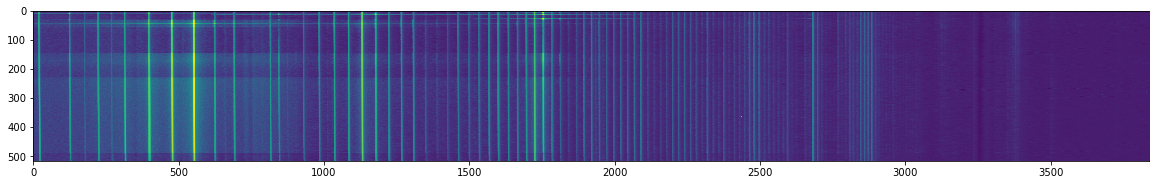

sample index: 1
frameindex1 steps: (array([     816, 27595424]),)
frameindex2 steps: (array([3344, 3616, 4160, 4432]),)
frames with slips: (array([3521, 3523, 4949, 7167]),)


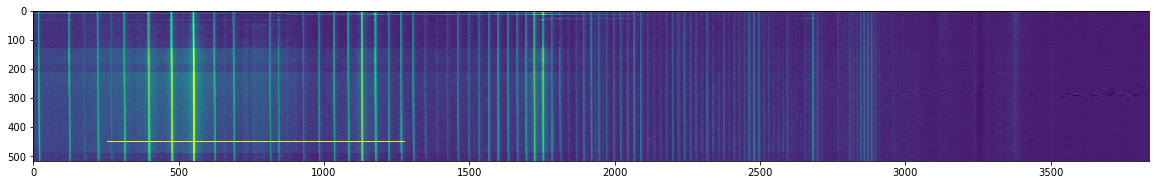

sample index: 2
frameindex1 steps: (array([     816, 20937408]),)
frameindex2 steps: (array([3344, 4160, 4432]),)
frames with slips: (array([  13,   28,   43,   58,   73,   88,  103,  118,  133,  148,  163,
        178,  193,  208,  223,  238,  253,  268,  283,  298,  313,  328,
        343,  358,  373,  388,  403,  418,  433,  448,  463,  478,  493,
        508,  523,  538,  553,  568,  583,  598,  613,  628,  643,  658,
        673,  688,  703,  718,  733,  748,  763,  778,  793,  808,  823,
        838,  853,  868,  883,  898,  913,  928,  943,  958,  973,  988,
       1003, 1018, 1033, 1048, 1063, 1078, 1093, 1108, 1123, 1138, 1153,
       1168, 1183, 1198, 1213, 1228, 1243, 1258, 1273, 1288, 1303, 1318,
       1333, 1348, 1363, 1378, 1393, 1408, 1423, 1438, 1453, 1468, 1483,
       1498, 1513, 1528, 1543, 1558, 1573, 1588, 1603, 1618, 1633, 1648,
       1663, 1678, 1693, 1708, 1723, 1738, 1753, 1768, 1783, 1798, 1813,
       1828, 1843, 1858, 1873, 1888, 1903, 1918, 1933, 1948, 19

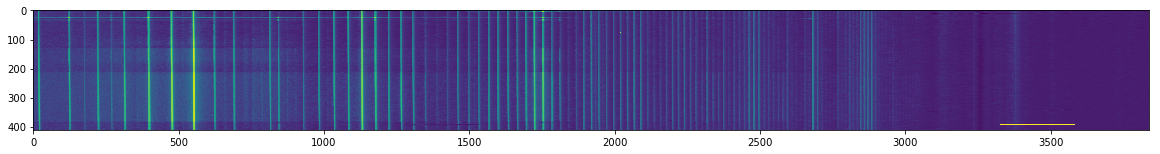

sample index: 3
frameindex1 steps: (array([], dtype=int64),)
frameindex2 steps: (array([3344, 3616, 4432, 4928, 6960]),)
frames with slips: (array([   6,  292, 3154, 3227, 6124]),)


ValueError: could not broadcast input array from shape (256) into shape (0)

In [110]:
[writeBinaryToCSV(i) for i in range(16)]